# PIK3CA: Effects of Mutation on PIK3CA

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

<b> Import CPTAC </b>

In [3]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [4]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### PIK3CA protein abundance with PIK3CA mutation

### Set gene and protein(s) of interest--in this case we are only looking at PIK3CA--and then create the "cross" dataframe, which contains all the information we need for plotting this gene

In [5]:
gene = "PIK3CA"
protList = ["PIK3CA"]
cross = CPTAC.compare_mutations(proteomics, protList[0], gene)

print(cross)
cross = cross[["Mutation", protList[0]]].dropna(axis=0)

      PIK3CA           Mutation Patient_Type
S001   -0.51  Missense_Mutation        Tumor
S002   -0.19           Wildtype        Tumor
S003   -0.20  Missense_Mutation        Tumor
S004   -0.65           Wildtype        Tumor
S005    0.39           Wildtype        Tumor
S006   -0.15           Wildtype        Tumor
S007   -0.35           Wildtype        Tumor
S008    0.27  Missense_Mutation        Tumor
S009   -0.11           Wildtype        Tumor
S010   -0.13           Wildtype        Tumor
S011   -0.79  Missense_Mutation        Tumor
S012   -0.56           Wildtype        Tumor
S013   -0.27  Missense_Mutation        Tumor
S014    0.05           Wildtype        Tumor
S015    0.23           Wildtype        Tumor
S016   -0.46           Wildtype        Tumor
S017   -0.54  Missense_Mutation        Tumor
S018   -0.27           Wildtype        Tumor
S019   -0.11           Wildtype        Tumor
S020   -0.64  Missense_Mutation        Tumor
S021   -0.61  Missense_Mutation        Tumor
S022   -0.

### Take out the control group (patients 101 - 140)

In [6]:
cross = cross[:100]

### Number of mutations in the cohort

In [7]:
mutations = cross.loc[cross["Mutation"] != "Wildtype"]
print(len(mutations))

42


### Perform a t-test with mutated and non-mutated protein levels

<b> Note: This analysis also includes the control group of healthy patients </b>

In [8]:
for protein in protList:
    mutated = cross.loc[cross["Mutation"] != "Wildtype"]
    wt = cross.loc[cross["Mutation"] == "Wildtype"]
    ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
    print("Test for " + protein + ": ")
    print(ttest)

Test for PIK3CA: 
Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


### We can now plot the data and see that PIK3CA has a significantly lower abundance when it is mutated 

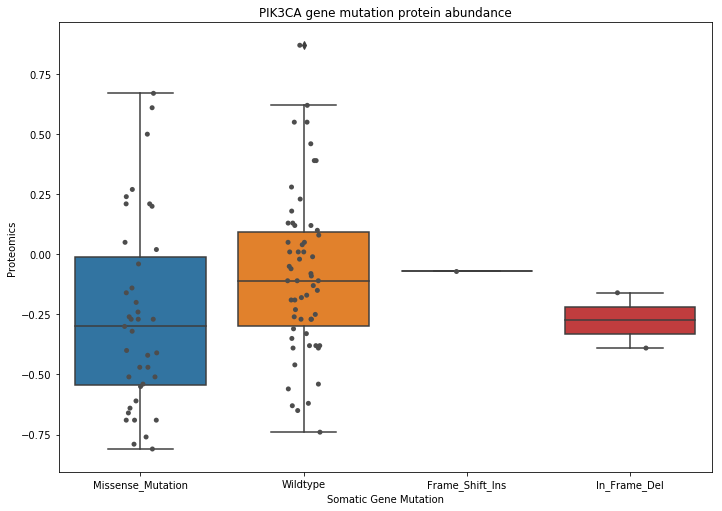

In [29]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("PIK3CA gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### Let's look at the p-value and plot for missense mutations specifically

In [30]:
mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for PIK3CA: 
Ttest_indResult(statistic=-2.3402474422953436, pvalue=0.021363570581694177)


In [31]:
missense_only = cross.loc[(cross["Mutation"] == "Wildtype") | (cross["Mutation"] == "Missense_Mutation")]

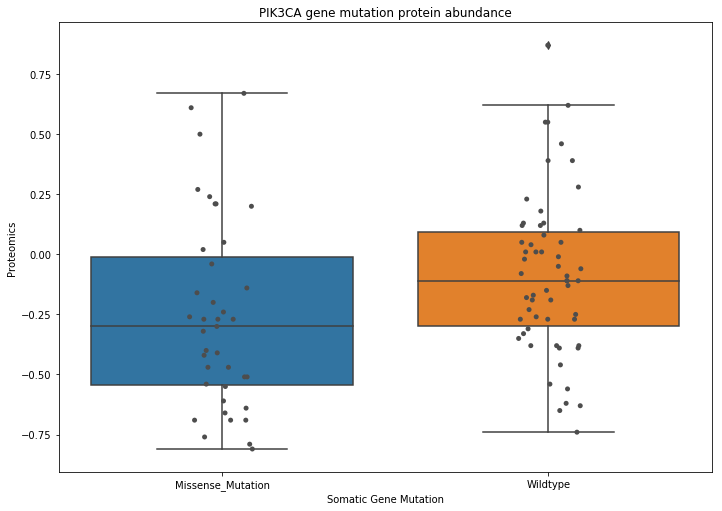

In [32]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=missense_only, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("PIK3CA gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=missense_only, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()